# Neural Network for image processing - MNIST

#### Focus points 
Data Analysis - Explainability - Performance (summary of the first three tutorials at the very end of the page)
### MNIST
<br> MNIST is a dataset with 60000 pictures of handwritten digits, ranging from zero to nine. They have already been classified and marked, so it can easily be used to train a neural network and get you into the topic as a novice in the world of image processing.


## Preparing the packages and dataset for the neural network

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import plot_model
import math
import pandas as pd
import seaborn as sn
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [ ]:
# %load_ext watermark

# %watermark -v -m -p numpy,tensorflow,pandas,seaborn,matplotlib

# print(" ")
# %watermark -u -b -t -z

x_train: (48000, 28, 28)
y_train: (48000,)
x_val: (6000, 28, 28)
y_val: (6000,)
x_test: (6000, 28, 28)
y_test: (6000,)

 Plot of the first 25 samples in the MNIST training set


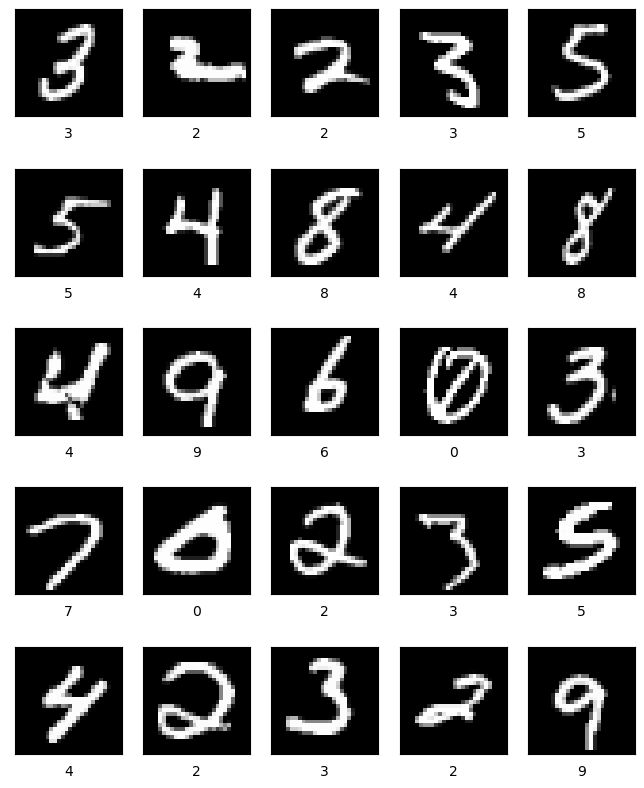

In [25]:
# Loading the MNIST dataset in one line
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#Splitting the dataset into train, validation and test
train_ratio = 0.80
validation_ratio = 0.10
test_ratio = 0.10

# train is now 80% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 10% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

# Printing the shape
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_val:', x_val.shape)
print('y_val:', y_val.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

# Plotting data samples
print('\n Plot of the first 25 samples in the MNIST training set')
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(8,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(y_train[i])
plt.show()

In [3]:
# #normalizing the input data
x_train_normalized = x_train/255 
x_val_normalized = x_val/255
x_test_normalized = x_test/255 

## Building models for comparison 

Building four models to compare them in the following:

In [4]:
#Building the first model with only dense layers and a flatten layer as the first layer:
model1 = Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(10),
])

#Building the second model with an additional dropout layer:
model2 = Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(10),
])

#Building two similar models, but this time with other activation functions (softmax & sigmoid):
model3 = Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation='softmax'),
  tf.keras.layers.Dense(256, activation='softmax'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation='softmax'),
  tf.keras.layers.Dense(256, activation='softmax'),
  tf.keras.layers.Dense(10),
])

model4 = Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation='sigmoid'),
  tf.keras.layers.Dense(256, activation='sigmoid'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation='sigmoid'),
  tf.keras.layers.Dense(256, activation='sigmoid'),
  tf.keras.layers.Dense(10),
])

In [ ]:
model1.summary()

In [ ]:
model2.summary()

In [ ]:
model3.summary()

In [ ]:
model4.summary()

Defining the loss:

In [26]:
model_list = [model1, model2, model3, model4]
model_history = [0, 0, 0, 0]
#Defining the loss when starting the neural network from zero, as its output should be random with a propabilty close to 1/10
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

Compiling all previous models with the calculated loss and the 'adam' optimizer:

In [6]:
for i in range(4):
    model_list[i].compile(optimizer='adam',
             loss=loss_fn,
             metrics=['accuracy'])

Determining the training parameters for the models. It will be the same for everyone to have fair conditions for comparison

In [7]:
import datetime
import os
%reload_ext tensorboard
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

for i in range(4):
    print("model" + str(i+1) + ':')
    model_history[i] = model_list[i].fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[tensorboard_callback])
    print('\n')

model1:
Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6438 - accuracy: 0.8895 - val_loss: 0.2580 - val_accuracy: 0.9322
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1956 - accuracy: 0.9445 - val_loss: 0.2248 - val_accuracy: 0.9415
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1555 - accuracy: 0.9559 - val_loss: 0.1510 - val_accuracy: 0.9595
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1268 - accuracy: 0.9641 - val_loss: 0.1704 - val_accuracy: 0.9548
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1227 - accuracy: 0.9663 - val_loss: 0.1398 - val_accuracy: 0.9642
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0967 - accuracy: 0.9729 - val_loss: 0.1191 - val_accuracy: 0.9667
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0937 - accuracy: 0.9748 - val_loss: 0.1625 - val_a

In [ ]:
# This line starts up tensorboard for you
# %tensorboard --logdir logs

Saving the models configurations

In [8]:
for i in range(4):
    safe_name = 'model' + str(i+1)
    model_list[i].save(safe_name, save_format='h5')

In [9]:
# Reloading weights of previously trained models from saved files (only necessary when restarting the kernel):
model1 = tf.keras.models.load_model('model1')
model2 = tf.keras.models.load_model('model2')
model3 = tf.keras.models.load_model('model3')
model4 = tf.keras.models.load_model('model4')

In [10]:
# Having the models predict the test dataset for later evaluation:
predictions_1 = model1.predict([x_test])
predictions_1 = np.argmax(predictions_1, axis=1)

predictions_2 = model2.predict([x_test])
predictions_2 = np.argmax(predictions_2, axis=1)

predictions_3 = model3.predict([x_test])
predictions_3 = np.argmax(predictions_3, axis=1)

predictions_4 = model4.predict([x_test])
predictions_4 = np.argmax(predictions_4, axis=1)

188/188 [==============================] - 0s 2ms/step


The following cells print a visualisation of the errors made by the models.
It's not necessary to run and inspect them, but still a nice gadget.

In [ ]:
# Plotting a visualisation of the first model's accuracy

numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions_1[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((28, 28)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

In [ ]:
# Plotting a visualisation of the second model's accuracy

numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions_2[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((28, 28)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

In [ ]:
# Plotting a visualisation of the third model's accuracy

numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions_3[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((28, 28)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

In [ ]:
# Plotting a visualisation of the fourth model's accuracy

numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions_4[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((28, 28)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

Plotting the heatmap for each model for a better understanding of where the model's weakpoints are:

model1 heatmap:


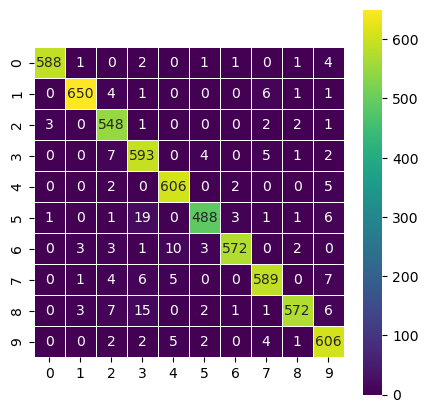

model2 heatmap:


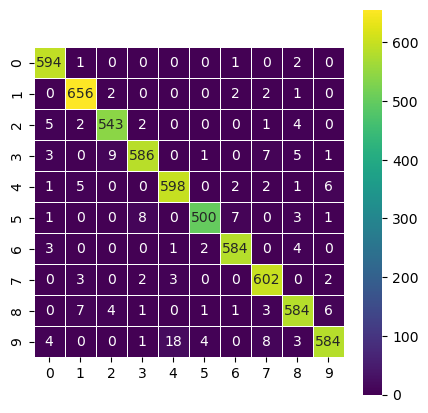

model3 heatmap:


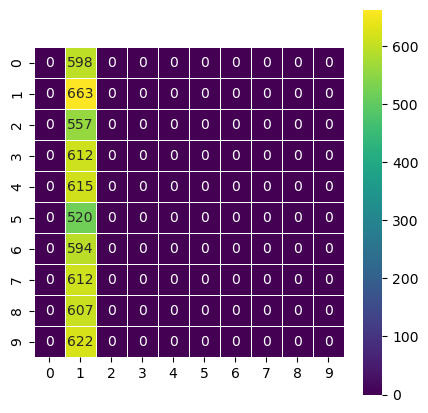

model4 heatmap:


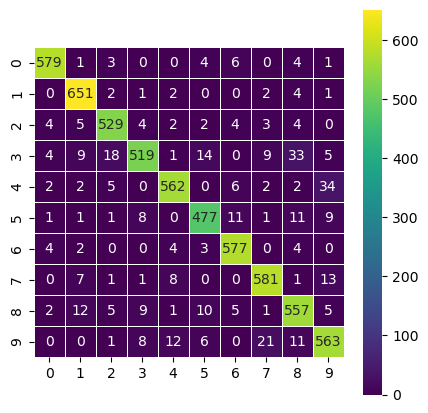

In [11]:
for i in range(4):
    predictions_list = [predictions_1, predictions_2, predictions_3, predictions_4]
    confusion_matrix = tf.math.confusion_matrix(y_test, predictions_list[i])

    f, ax = plt.subplots(figsize=(5, 5))
    sn.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.7,
        fmt="d",
        square=True,
        ax=ax,
        cmap="viridis",
    )
    print('model'+ str(i+1) + ' heatmap:')
    plt.show()

What catches the eye is that model3 predicts every number as a one. If you think about it, this makes a lot of sense when you look into what the softmax activation function realy does. It scales all values in a way, that the sum of every value equals a one.

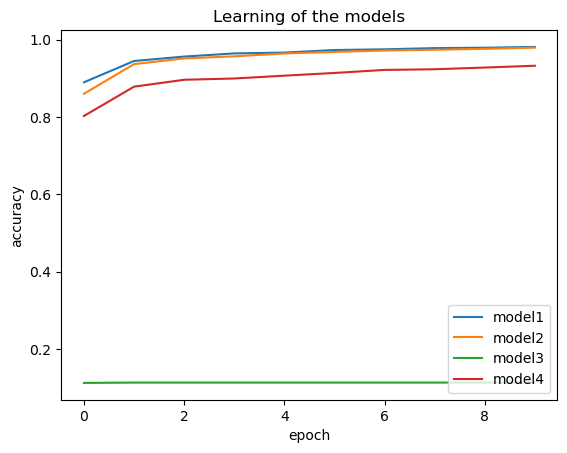

In [12]:
plt.plot(model_history[0].history['accuracy'])
plt.plot(model_history[1].history['accuracy'])
plt.plot(model_history[2].history['accuracy'])
plt.plot(model_history[3].history['accuracy'])

plt.title('Learning of the models')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model1', 'model2', 'model3', 'model4'], loc='lower right')
plt.show()

In [13]:
batch_size=64
loss1, acc1 = model1.evaluate(x_test, y_test, batch_size=batch_size)
loss2, acc2 = model2.evaluate(x_test, y_test, batch_size=batch_size)
loss3, acc3 = model3.evaluate(x_test, y_test, batch_size=batch_size)
loss4, acc4 = model4.evaluate(x_test, y_test, batch_size=batch_size)

print("\n model1 accuracy: %.1f%%" % (100.0 * acc1))
print("\n model2 accuracy: %.1f%%" % (100.0 * acc2))
print("\n model3 accuracy: %.1f%%" % (100.0 * acc3))
print("\n model4 accuracy: %.1f%%" % (100.0 * acc4))

94/94 [==============================] - 0s 3ms/step - loss: 0.2152 - accuracy: 0.9325

 model1 accuracy: 96.9%

 model2 accuracy: 97.2%

 model3 accuracy: 11.1%

 model4 accuracy: 93.3%


Except for the third model, all models seem to have a similar accuracy. The dropout layer in the second and third model prevents the overfitting of a model, when trainied with more epochs. The relu activation function fits well for the MNIST dataset, as the negative activation of a neuron is not necessary for this approach. Sigmoid activation function fits well for numerous neural networks.

## Influence of epochs and learning rate 
In the following, the second model will be analyzed under the influence of a change in epochs and learning rates

3 epochs with learning rate=0.01
Epoch 1/3
1500/1500 [==============================] - 8s 5ms/step - loss: 1.7302 - accuracy: 0.7632 - val_loss: 0.7524 - val_accuracy: 0.8035
Epoch 2/3
1500/1500 [==============================] - 7s 5ms/step - loss: 0.7552 - accuracy: 0.8008 - val_loss: 0.7696 - val_accuracy: 0.7323
Epoch 3/3
1500/1500 [==============================] - 10s 7ms/step - loss: 1.4783 - accuracy: 0.4909 - val_loss: 1.5328 - val_accuracy: 0.4140


3 epochs with learning rate=0.005
Epoch 1/3
1500/1500 [==============================] - 11s 6ms/step - loss: 0.9340 - accuracy: 0.8592 - val_loss: 0.3712 - val_accuracy: 0.9023
Epoch 2/3
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3820 - accuracy: 0.9092 - val_loss: 0.3383 - val_accuracy: 0.9243
Epoch 3/3
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4125 - accuracy: 0.9077 - val_loss: 0.3397 - val_accuracy: 0.9135


3 epochs with learning rate=0.0001
Epoch 1/3
1500/1500 [=============

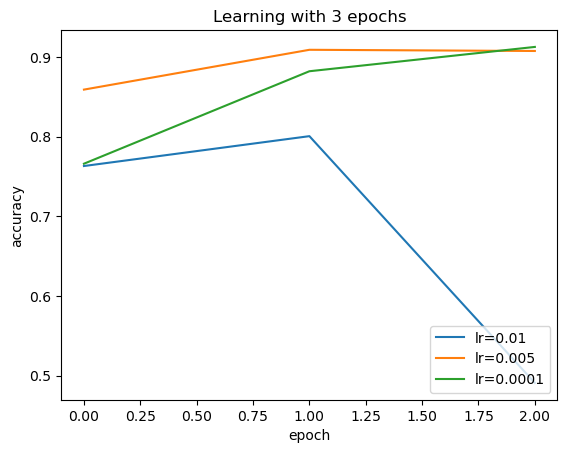

5 epochs with learning rate=0.01
Epoch 1/5
1500/1500 [==============================] - 11s 7ms/step - loss: 1.6757 - accuracy: 0.7879 - val_loss: 0.6694 - val_accuracy: 0.8302
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 1.2389 - accuracy: 0.5945 - val_loss: 1.6794 - val_accuracy: 0.3272
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 2.0777 - accuracy: 0.2541 - val_loss: 2.1107 - val_accuracy: 0.1668
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 1.9951 - accuracy: 0.2312 - val_loss: 1.9128 - val_accuracy: 0.2458
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 2.0250 - accuracy: 0.2449 - val_loss: 1.9551 - val_accuracy: 0.2505


5 epochs with learning rate=0.005
Epoch 1/5
1500/1500 [==============================] - 9s 5ms/step - loss: 0.9759 - accuracy: 0.8663 - val_loss: 0.3956 - val_accuracy: 0.9097
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - los

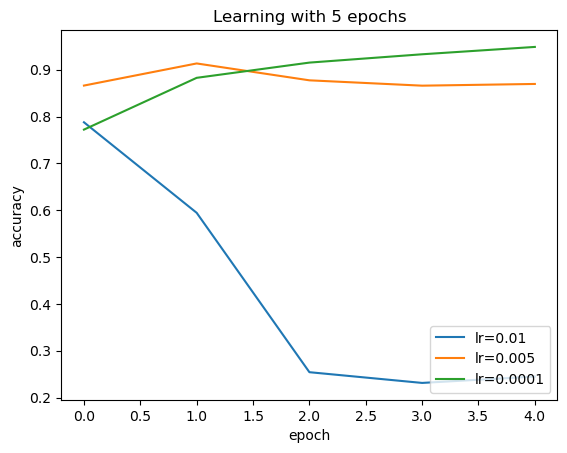

10 epochs with learning rate=0.01
Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 1.8545 - accuracy: 0.7824 - val_loss: 0.5306 - val_accuracy: 0.8563
Epoch 2/10
1500/1500 [==============================] - 8s 6ms/step - loss: 1.3566 - accuracy: 0.5559 - val_loss: 2.0060 - val_accuracy: 0.2700
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 1.7375 - accuracy: 0.3060 - val_loss: 1.6700 - val_accuracy: 0.3757
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 1.7520 - accuracy: 0.3157 - val_loss: 1.6169 - val_accuracy: 0.3373
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 2.1315 - accuracy: 0.1865 - val_loss: 2.3040 - val_accuracy: 0.0983
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 2.3023 - accuracy: 0.1115 - val_loss: 2.3031 - val_accuracy: 0.1098
Epoch 7/10
1500/1500 [==============================] - 8s 6ms/step - loss: 2.3024 - accuracy: 0.1115

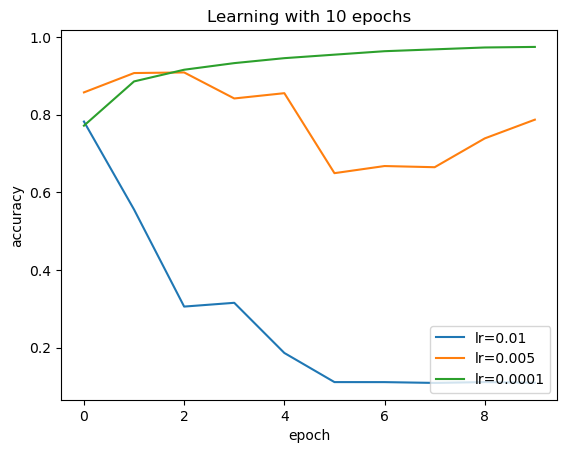

20 epochs with learning rate=0.01
Epoch 1/20
1500/1500 [==============================] - 9s 5ms/step - loss: 1.8856 - accuracy: 0.7911 - val_loss: 0.6716 - val_accuracy: 0.8400
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.9371 - accuracy: 0.7682 - val_loss: 1.9325 - val_accuracy: 0.3973
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 2.2583 - accuracy: 0.1563 - val_loss: 2.2786 - val_accuracy: 0.1190
Epoch 4/20
1500/1500 [==============================] - 8s 6ms/step - loss: 2.1290 - accuracy: 0.1622 - val_loss: 1.8914 - val_accuracy: 0.1952
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 1.9368 - accuracy: 0.1988 - val_loss: 1.9230 - val_accuracy: 0.1852
Epoch 6/20
1500/1500 [==============================] - 9s 6ms/step - loss: 1.9560 - accuracy: 0.1916 - val_loss: 1.9818 - val_accuracy: 0.1822
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 1.9387 - accuracy: 0.1950 

Epoch 17/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0396 - accuracy: 0.9878 - val_loss: 0.1491 - val_accuracy: 0.9713
Epoch 18/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0359 - accuracy: 0.9893 - val_loss: 0.1490 - val_accuracy: 0.9738
Epoch 19/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0328 - accuracy: 0.9902 - val_loss: 0.1530 - val_accuracy: 0.9752
Epoch 20/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0324 - accuracy: 0.9895 - val_loss: 0.1513 - val_accuracy: 0.9725




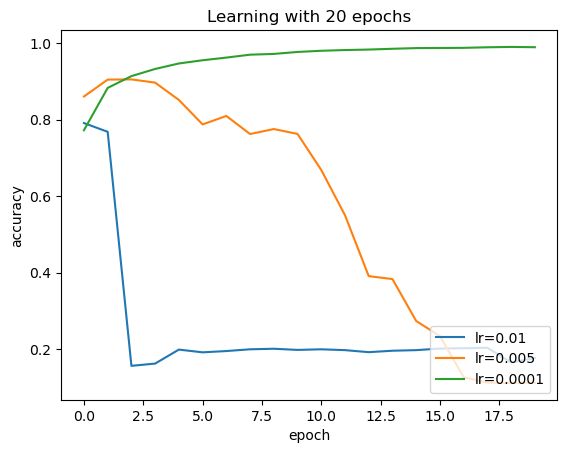

In [14]:
epoch_list = [3, 5, 10, 20]
learning_rates = [0.01, 0.005, 0.0001]
model_list2 = [0,0,0,0,0,0,0,0,0,0,0,0]
model_history2 = [0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(4):
    for j in range(3):
        model_list2[j + i*3] = Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(10),
        ])
        model_list2[j + i*3].compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rates[j]), loss=loss_fn, metrics=['accuracy'])
        print(str(epoch_list[i]) + ' epochs' + ' with learning rate=' + str(learning_rates[j]))
        model_history2[j + i*3] = model_list2[j + i*3].fit(
        x_train,
        y_train,
        epochs=epoch_list[i],
        batch_size=32,
        validation_data=(x_val, y_val),
        callbacks=[tensorboard_callback])
        print('\n')
    plt.plot(model_history2[0+i*3].history['accuracy'])
    plt.plot(model_history2[1+i*3].history['accuracy'])
    plt.plot(model_history2[2+i*3].history['accuracy'])

    plt.title('Learning with ' + str(epoch_list[i]) + ' epochs')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['lr=0.01', 'lr=0.005', 'lr=0.0001'], loc='lower right')
    plt.show()

In [15]:
#Saving the weights of the previously trained models
for i in range(12):
    safe_name = 'model' + str(i+5)
    model_list2[i].save(safe_name, save_format='h5')

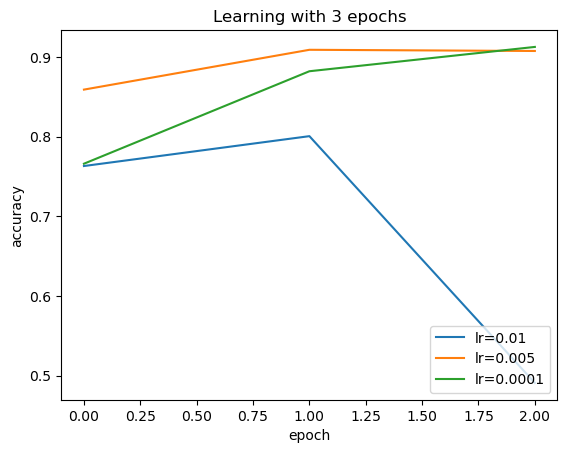

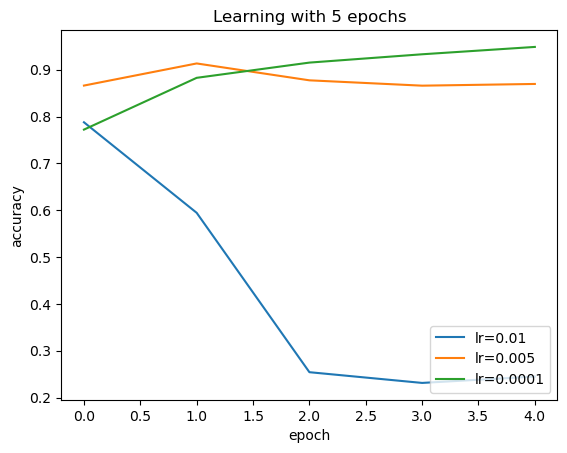

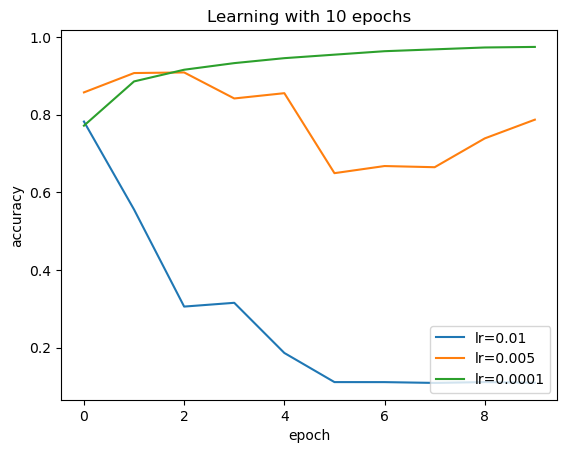

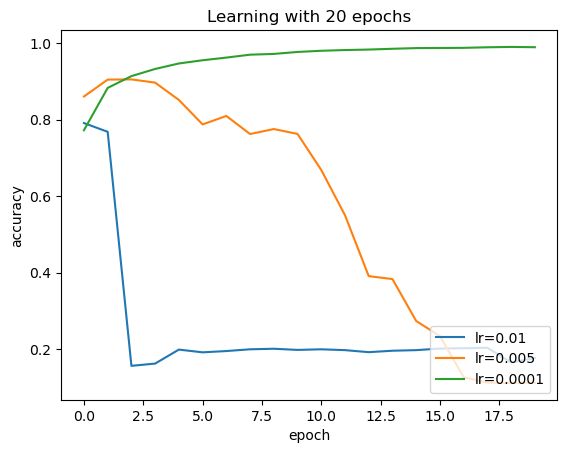

In [18]:
#For better clarity you can print the four graphs again to compare them without having to scroll
for i in range(4):
    plt.plot(model_history2[0+i*3].history['accuracy'])
    plt.plot(model_history2[1+i*3].history['accuracy'])
    plt.plot(model_history2[2+i*3].history['accuracy'])

    plt.title('Learning with ' + str(epoch_list[i]) + ' epochs')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['lr=0.01', 'lr=0.005', 'lr=0.0001'], loc='lower right')
    plt.show()

The highest accuracy that's been reached was achieved by the model with 20 epochs and a learning rate of 0.0001 (training accuracy of 98.95% and validation accuracy of 97.25%). Generally speaking you could say that the lowest learning rate results in the highest accuracy after training with more epochs, even though it starts with the lowest accuracy of all models. The higher learning rate of 0.01 results in higher oscillations and a low accuracy after going through multiple epochs (noticeable change after three epochs). The learning rate of 0.005 starts with the highest accuracy but does not reach the accuracy of the model with the 0.0001 learning rate after more than 3 epochs of training.
***
My conclusion from this is that the learning rate of 0.0001 is more desireable than the higher learning rates, as it reaches the highest maximal accuracy of all tested models. If you do not have the time or resources to train the model for more than one epoch, you can use the 0.005 learning rate, as it's accuracy is the highest from the very beginning to the end of the first epoch.

We will now test the model with 20 epochs and a learning rate of 0.0001 on wether the high accuracy is truly capable of recognizing the test data from the MNIST dataset, or if the high accuracy is due to overfitting the model with the training and validation data.
<br>
If the dropout layer works like it is intended to do, the evaluation of the model should result in a similar accuracy:

In [19]:
batch_size=64
model16 = tf.keras.models.load_model('model16')
loss16, acc16 = model16.evaluate(x_test, y_test, batch_size=batch_size)

print("\n model16 accuracy: %.1f%%" % (100.0 * acc16))

94/94 [==============================] - 0s 2ms/step - loss: 0.1547 - accuracy: 0.9693

 model16 accuracy: 96.9%


With this it is confirmed, that the model actually reaches an accuracy close to 97%, which is a very good value.

## Modifying the dataset
Now that we have a model that is guaranteed to deliver a good performance, I'd like to test it with a few modifications, done to the dataset. 
<br>
Therefore the number 'one' is removed from the dataset. The model will then be trained with the modified dataset and tested with the normal dataset. 
<br> As the number 'seven' looks most similar, I expect the model to predict all pictures of 'ones' as 'sevens':

In [ ]:
#Defining a function that allows us to create a modified dataset
def remove(digit, x, y):
    idx = (y != digit).nonzero()
    return x[idx], y[idx]

#preparing the new dataset
x_train_no1, y_train_no1 = remove(1, x_train, y_train)

#New model that is to be trained without ones
model17 = Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(10),
])

#Compiling the model with a learning rate of 0.0001
model17.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss=loss_fn, metrics=['accuracy'])

#Training the model with 20 epochs
model17_history = model17.fit(
x_train_no1,
y_train_no1,
epochs=20,
batch_size=32,
validation_data=(x_val, y_val),
callbacks=[tensorboard_callback])

#Saving the model
model17.save(safe_name, save_format='h5')

#Printing the heatmap for better visualisation
predictions_17 = model17.predict([x_test])
predictions_17 = np.argmax(predictions_17, axis=1)

Epoch 1/20
1331/1331 [==============================] - 8s 5ms/step - loss: 2.9271 - accuracy: 0.7480 - val_loss: 3.1177 - val_accuracy: 0.8020
Epoch 2/20
1331/1331 [==============================] - 7s 6ms/step - loss: 0.6411 - accuracy: 0.8794 - val_loss: 2.5908 - val_accuracy: 0.8260
Epoch 3/20
1331/1331 [==============================] - 7s 5ms/step - loss: 0.3858 - accuracy: 0.9087 - val_loss: 2.2890 - val_accuracy: 0.8368
Epoch 4/20
1331/1331 [==============================] - 8s 6ms/step - loss: 0.2681 - accuracy: 0.9292 - val_loss: 2.1931 - val_accuracy: 0.8417
Epoch 5/20
1331/1331 [==============================] - 8s 6ms/step - loss: 0.2001 - accuracy: 0.9432 - val_loss: 2.1945 - val_accuracy: 0.8473
Epoch 6/20
1331/1331 [==============================] - 7s 6ms/step - loss: 0.1635 - accuracy: 0.9532 - val_loss: 2.2740 - val_accuracy: 0.8493
Epoch 7/20
1331/1331 [==============================] - 8s 6ms/step - loss: 0.1273 - accuracy: 0.9612 - val_loss: 2.2825 - val_accuracy:

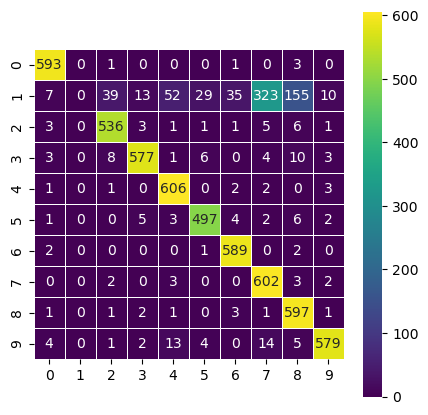

94/94 [==============================] - 0s 2ms/step - loss: 3.3636 - accuracy: 0.8627

 model17 accuracy: 86.3%


In [22]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions_17)

f, ax = plt.subplots(figsize=(5, 5))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.7,
    fmt="d",
    square=True,
    ax=ax,
    cmap="viridis",
)
print('model heatmap without being trained on ones:')
plt.show()
    
#Evaluating the dataset with the normal test data, containing ones as usual
batch_size=64
model17 = tf.keras.models.load_model('model17')
loss17, acc17 = model17.evaluate(x_test, y_test, batch_size=batch_size)
print("\n model17 accuracy: %.1f%%" % (100.0 * acc17))

As expected, the 'ones' are predicted as mostly 'sevens' and surprisingly with not much less propability as 'eights'. We can now print the numbers in order to better understand the similarity between 'ones' and 'eights', that the neural network recognized:

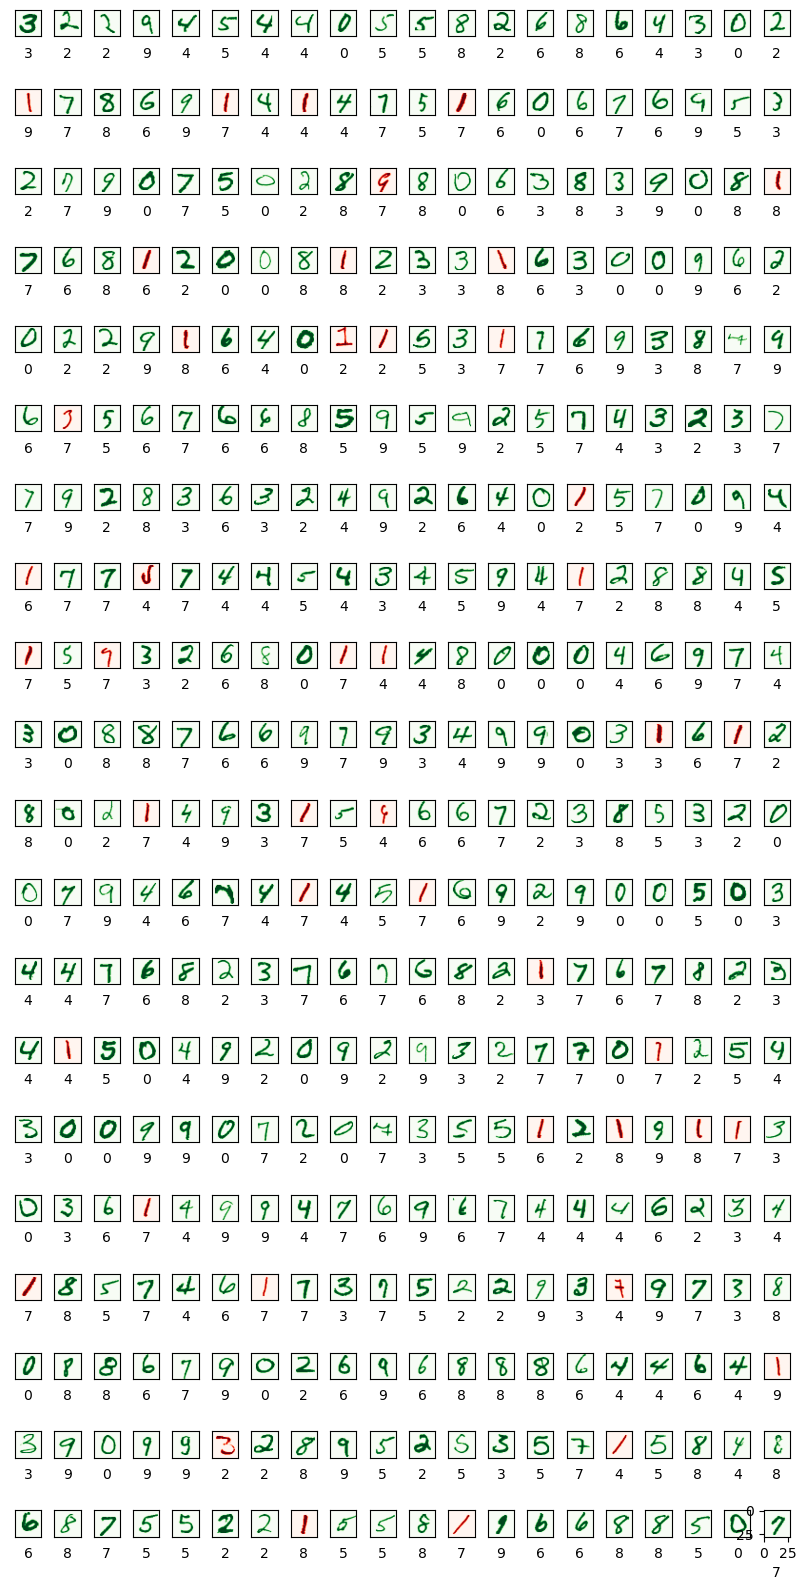

In [23]:
numbers_to_display = 400
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10, 20))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions_17[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((28, 28)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

It is noticable, that most ones are mistaken as either 'sevens' or 'eights'. I can't see any similarities between the 'eights', that have been guessed correctly and the 'ones' that have been mistaken as 'eights'. With a lot of imagination you could argue that a very slim eight has the same outline as a one, but as I said, I'll leave that to your imagination, as further explanation would require a lot of deep analysis.

## Summary of the first three tutorials
### Tutorial 1
In this tutorial back propagation is taught to us by showing the necessary equations and how to implement them as code. Afterward the tutorial guides us through the process of building a neural network for image classification of MNIST digits by utilizing tensorflow and the keras library. The last chapter shows a few possibilities of regularization by providing a few code samples that can be applied. 
### Tutorial 2
The second tutorial provides us with a pre-trained model from the VGG16 model. It was pre-trained with the ImageNet dataset, which contains 1.4M images and 1000 classes of web images. We then train the model with the 'Dogs vs Cats' dataset from Kaggle, containing 3000 pictures of cats and dogs. After just two epochs of learning, it is able to tell, wether a picture contains either a dog or a cat. The last layer in this neural network contains only one neuron, as the picture is either a dog or a cat (which equals 'not dog').
### Tutorial 3
This tutorial teaches us about Segmentation with an U-Net. Therefore 2D Convolution, MaxPooling and Concatenation are used and roughly explained. Afterwards we generate more training and test data by altering the thirty images we are provided with to create more images that are eventually used for training. Our neural network is then used to predict cell boundaries from an image containing numerous cells. These images are saved in a folder and can eventually be viewed and confirmed by an observer.